# LCPB 21-22 exercise 2: *Deep Neural Network (DNN)*

#### TASKS

1. Study the performance of the DNN when the number N of samples is
a) reduced
b) increased
c) augmented
Point 1.c means taking the given N=4000 samples, split them in training and validation, and
“augment” the training samples by generating artificial ones that are similar to the real samples. For
instance, a given sample x=(x1,x2) can be transformed to multiple copies (x1+s1, x2+s2) where
each (s1,s2) is a small random shift.
2. Implement a “grid search” as shown in NB11 to improve one or more of the aspects or
parameters of the model. Possible tests include: different activation units (sigmoid, relu, elu,
etc.), different minimization algorithms (ADAM, RMSprop, Nesterov, etc.), different
dropouts, different size or number of layers, etc.

##### *OPTIONAL*

3. Check if any other rescaling of data or initialization of weights may improve the accuracy of the
DNN.
4. Study different data, for instance generated by the second nonlinear function or other choices.

In [1]:
# importing cell
import numpy as np
import matplotlib.pyplot as plt
# DNN stuff
from keras.models import Sequential
from keras.layers import Dense, Dropout


# random seed for reproducibility
np.random.seed(12345)

## Data generation


In [2]:
# defining non linear function to interpolate

def f(x,c=1):
    r=0
    if c==1:
        if x[0]>-20 and x[1]>-40 and x[0]+x[1] < 40:
            r=1
    if c==2:
        if (np.sign(x.sum())*np.sign(x[0]))*np.cos(np.linalg.norm(x)/(2*np.pi))>0:
            r=1
    return r


def filename(s,TYPE=1):
    return "./DATA/"+s+"-for-DNN-"+str(TYPE)+".dat"


mkdir: cannot create directory ‘DATA’: File exists
2 5 1


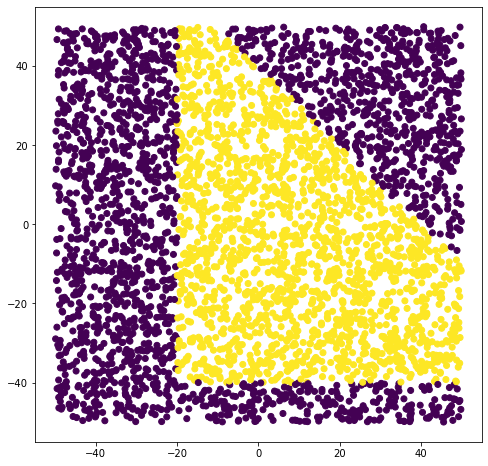

In [3]:
# number of data
N=4000
# N=10000
# size of each sample
L=2
# box size
B=100

!mkdir DATA

TYPE=1

print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")

## Training


2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

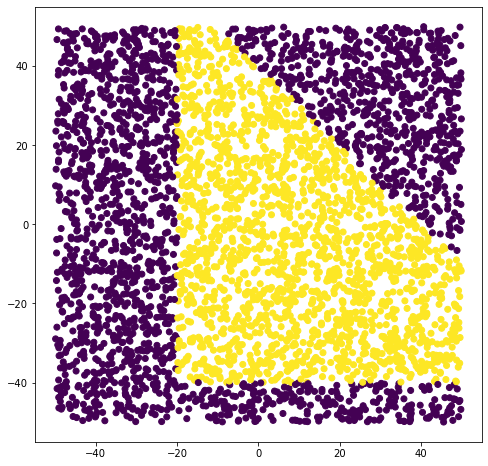

In [4]:
perc_train = 0.8

# Keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show


In [5]:
# Train Test split
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [6]:
# Rescaling
def Rescale(x):
    # return (x-x.mean())/np.sqrt(x.var()), np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [7]:
# Definition of several types of models

CASE=1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(3,activation='sigmoid'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 20)                60        
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
# compile it with a given loss function and optimizer algorithm
model.compile(loss='binary_crossentropy',
              #optimizer='RMSprop',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
# TRAINING
fit = model.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/400
64/64 - 0s - loss: 0.6734 - accuracy: 0.5763 - val_loss: 0.6549 - val_accuracy: 0.6675 - 342ms/epoch - 5ms/step
Epoch 2/400
64/64 - 0s - loss: 0.6281 - accuracy: 0.6675 - val_loss: 0.5962 - val_accuracy: 0.6275 - 47ms/epoch - 729us/step
Epoch 3/400
64/64 - 0s - loss: 0.5530 - accuracy: 0.7237 - val_loss: 0.5239 - val_accuracy: 0.7437 - 46ms/epoch - 720us/step
Epoch 4/400
64/64 - 0s - loss: 0.4896 - accuracy: 0.7881 - val_loss: 0.4623 - val_accuracy: 0.8025 - 45ms/epoch - 703us/step
Epoch 5/400
64/64 - 0s - loss: 0.4312 - accuracy: 0.8450 - val_loss: 0.4063 - val_accuracy: 0.8462 - 46ms/epoch - 726us/step
Epoch 6/400
64/64 - 0s - loss: 0.3869 - accuracy: 0.8706 - val_loss: 0.3643 - val_accuracy: 0.8838 - 47ms/epoch - 727us/step
Epoch 7/400
64/64 - 0s - loss: 0.3584 - accuracy: 0.8844 - val_loss: 0.3361 - val_accuracy: 0.8975 - 46ms/epoch - 720us/step
Epoch 8/400
64/64 - 0s - loss: 0.3368 - accuracy: 0.8941 - val_loss: 0.3190 - val_accuracy: 0.8988 - 46ms/epoch - 718us/step
E

Okay so we have trained our model; now we look at the loss progression during training, both on training and validation sets.

In [10]:
# the .fit() method of the Keras Model class returns a history object,
# whose attribute History.history is basically a dictionary:
fit.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

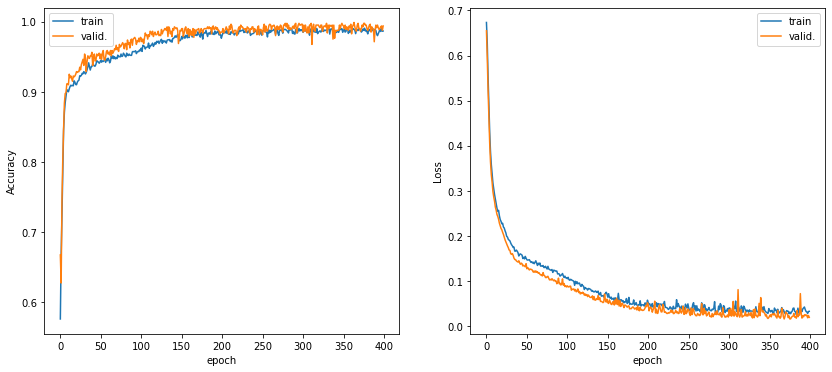

In [11]:
fig,axs=plt.subplots(1,2,figsize=(14,6.))
axs[0].plot(fit.history['accuracy'],label="train")
axs[0].plot(fit.history['val_accuracy'],label="valid.")
axs[0].set_xlabel('epoch')
axs[0].set_ylabel("Accuracy")

axs[1].plot(fit.history['loss'],label="train")
axs[1].plot(fit.history['val_loss'],label="valid.")
axs[1].set_xlabel('epoch')
axs[1].set_ylabel("Loss")
for ax in axs: ax.legend()

In [12]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model.predict(grid_r)

51 2601
[50. 50.]


<function matplotlib.pyplot.show(close=None, block=None)>

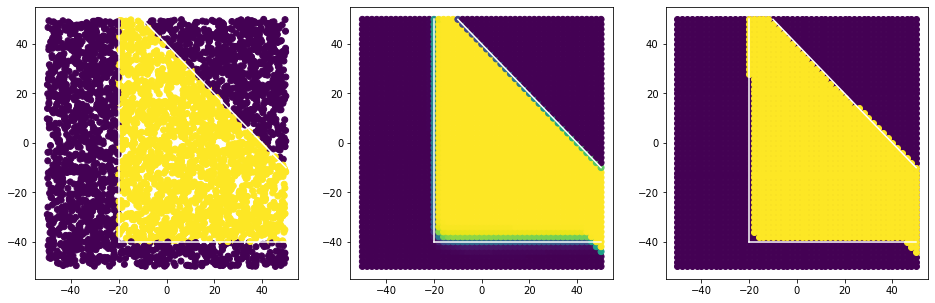

In [13]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.show